# Regresión Lineal Simple

La regresión lineal simple tiene como propósito predecir una variable dependiente $y$ en base a una variable independiente $x$.
Un caso de uso sería cuando se tiene un conjunto de datos donde $x$ representa los metros cuadrados de un inmueble y "$y$" representa el precio en miles de dólares. 

Si tenemos un conjunto de m parejas ($x$, $y$), y una función lineal que las relacione, tendríamos que: 

$$f{w,b}(x) = wx+b$$

La dimensión de $x$ es (1,m), la dimensión de w es 1, la de b es 1, pero a ésta se le debe hacer broadcasting para a hacer la suma con el vector (1,m) que salga de $wx$. Broadcasting es convertir ese escalar en un vector de $m$ cantidad de ese escalar $b$.

Vamos a implementar en código Python normal, sin usar Numpy. Después lo usaremos.
Primero importamos/corremos el notebook que recoge las ideas del capítulo 9.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#from ipynb.fs.full.C9_Vectores_y_Matrices import multiply, dimension

In [3]:
def dimension(m):
    rows = len(m)
    #len(m[0])
    if type(m[0]) == int:
        tupla = (rows, 1)
    else:
        columns = len(m[0])
        tupla = (rows, columns)
    return tupla

def multiply(vector, scalar):
        output = []
        for i in range(len(vector)):
            output.append(vector[i] * scalar)
        return output

In [21]:
# Creemos datos para la función f(x) = 2x + 1
x = [-9,-7,-5,-3,-1,0,1,3,5,7,9]
y = [-17,-13,-9,-5,-1,0,3,7,11,15,19]

print(dimension(x))
print(dimension(y))

(11, 1)
(11, 1)


In [5]:
def zeros(m):
    salida = []
    for i in range(m):
        salida.append(0)
    return salida

#print(zeros(dimension(x)[0]))

In [6]:
def sum(vector, scalar):
    output_vector = []
    for i in range(len(vector)):
        output_vector.append(vector[i] + scalar)
    return output_vector

In [7]:
def forward_propagation(x, w, b):
    m = dimension(x)[0]
    #f_wb = zeros(m)
    for i in range(m):
        f_wb = sum(multiply(x, w), b)
    return f_wb

In [14]:
y_hat = forward_propagation(x, w, b)

In [15]:
y_hat

[-800, -600, -400, -200, 0, 100, 200, 400, 600, 800, 1000]

In [10]:
y

[-17, -13, -9, -5, -1, 0, 3, 7, 11, 15, 19]

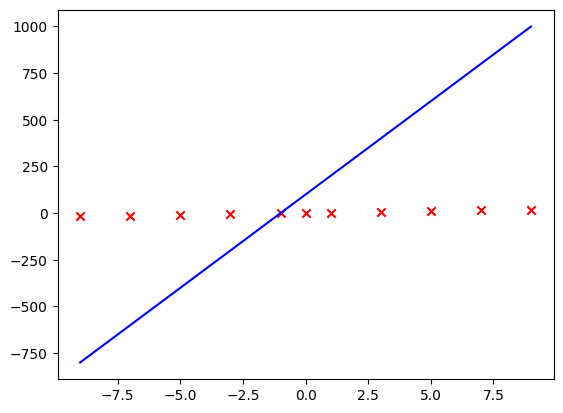

In [16]:
def graficar_modelo(x_train, y_train, tmp_f_wb):
    # Plot our model prediction
    plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

    # Plot the data points
    plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
    plt.show()

graficar_modelo(np.array(x), np.array(y), np.array(y_hat))

Vemos que $w$ y $b$ tienen valores muy lejanos de la realidad, ¿Cómo medir cuán lejos están nuestras predicciones de la $y$ de entrenamiento? hay varias formas: error cuadrático medio, error medio absoluto.

$$ECM = \frac{1}{m}\sum_{i=1}^{m}(y - \hat{y})^2$$
$$\begin{gather} \
EMA = \frac{\sum_{i=1}^{m} |y - \hat{y}|}{m}\
\end{gather}
$$
Pero la que más se usa es ésta:
$$
\begin{equation}
\frac{1}{m}\sum_{i=1}^{m}(y - \hat{y})^2
\end{equation}
$$

Donde $m$ es la cantidad de ejemplos de datos que estamos trabajando

¿Cómo mejorar nuestra línea de predicción? implementamos el algoritmo del descenso del gradiente.

In [17]:
def calcular_error(y, y_hat):
    
    m = len(y)
    suma_errores = 0
    for i in range(m):
        squared_error = []
        error = y[i] - y_hat[i]
        squared_error = error ** 2
        suma_errores += squared_error
    return suma_errores * (1/m)

calcular_error(y, y_hat)

297939.09090909094

## Implementación del descenso del gradiente

### Actualización de pesos
Usamos un coeficiente $\alpha$ que sea un decimal que haga la actualización de pesos poco a poco, es decir, que vaya paso a paso disminuyendo la función de costo o error.

$w = w - \alpha * \frac{\partial}{\partial w}J(w,b)$

$b = b - \alpha * \frac{\partial}{\partial b}J(w,b)$

se usa la derivada por la sencilla razón de que hallemos el conjunto de $w$ y $b$ donde la derivada de la función de costo $J$ valga lo menos posible, es decir, bote un error cuadrático tan bajo como sea posible. Otra forma de decirlo es buscar el $w$ y $b$ donde la recta tangente a la función de costo J sea 0 o al menos casi 0. Por eso usamos la herramienta de la derivada, para actualizar los pesos y lograr cada vez mejores predicciones en cada iteración.

Las derivadas son:

$\frac{\partial}{\partial w}J(w,b) = \frac{\partial}{\partial w}J(w,b)(-\frac{2}{m}\sum_{i=1}^{m}(y - \hat{y})^2)$

Si $\hat{y} = wx + b$; entonces $\frac{\partial}{\partial w}J(w,b) = -\frac{2}{m}\sum_{i=1}^{m}(y - wx - b)*x$

$\frac{\partial}{\partial b}J(w,b) = -\frac{2}{m}\sum_{i=1}^{m}(y - wx - b)$

In [25]:
def DJ_Dw(x, y, y_hat):
    m = len(y)
    suma_errores = 0
    for i in range(m):
        error = (y[i] - y_hat[i])* x[i]
        suma_errores += error
    return suma_errores*-2/m

def DJ_Db(y, y_hat):
    m = len(y)
    suma_errores = 0
    for i in range(m):
        error = (y[i] - y_hat[i])
        suma_errores += error
    return suma_errores*-2/m

In [26]:
import gc
gc.collect()

1090

In [40]:
def entrenar(x, y, epocas, alpha = 0.001):
    #  INICIALIZAMOS LOS PESOS
    w = 100
    b = 100
    for i in range(epocas):
        y_hat = forward_propagation(x, w, b)
        costo = calcular_error(y, y_hat)
        w = w - alpha * DJ_Dw(x, y, y_hat)
        b = b - alpha * DJ_Db(y, y_hat)
        if (i+1) % 10 == 0:
            print(f"Costo en la época {i+1}: {costo}")

    print(f"W y b al final del entrenamiento: w:{w}, b:{b}")

In [41]:
entrenar(x, y, 300, 0.01)

Costo en la época 10: 6825.642002689031
Costo en la época 20: 4556.867265482963
Costo en la época 30: 3042.228383081677
Costo en la época 40: 2031.0433908604957
Costo en la época 50: 1355.9682291345237
Costo en la época 60: 905.2826696324036
Costo en la época 70: 604.4013973538838
Costo en la época 80: 403.5306614289287
Costo en la época 90: 269.4277568331162
Costo en la época 100: 179.89958868943893
Costo en la época 110: 120.12986994008946
Costo en la época 120: 80.2271292334639
Costo en la época 130: 53.58774144284416
Costo en la época 140: 35.80307379115102
Costo en la época 150: 23.929887891865764
Costo en la época 160: 16.003254335372727
Costo en la época 170: 10.711370583876537
Costo en la época 180: 7.178466805776432
Costo en la época 190: 4.819872080073108
Costo en la época 200: 3.2452554390540436
Costo en la época 210: 2.19402881705149
Costo en la época 220: 1.4922215440814048
Costo en la época 230: 1.0236894140108717
Costo en la época 240: 0.7108936289523896
Costo en la époc

¡Elaboramos exitosamente con código Python un algoritmo de regresión lineal!